# Preamble

In [38]:
libraries = c("dplyr","magrittr","tidyr","ggplot2","gridExtra","RColorBrewer") #,"zoo","directlabels")
for(x in libraries) {
    library(x,character.only=TRUE,warn.conflicts=FALSE) }

# options(jupyter.plot_mimetypes = "image/svg+xml") 
clrs = brewer.pal(8,"Set1")

if (Sys.info()[['sysname']]=='Windows') {
    windowsFonts(Times = windowsFont("Times New Roman"))
    theme_set(theme_bw(base_size=12,base_family='Times')) 
} else { theme_set(theme_bw(base_size=12,base_family='Times')) }
    
'%&%' = function(x,y)paste0(x,y)
'%!in%' = function(x,y)!('%in%'(x,y))
    
# Initialization of array for recorded plots
plot_point_sizes = c(); nm = c(); plot_point_sizes = list()

# Sensitivity analysis for $\mu$ and $\bar\mu$

In [39]:
"../figures/draft/final-sensitivity_mu.csv" %>% 
    read.csv %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(T,Tbar) -> df
#     group_by(T) %>% mutate(y = 1:n()) %>% ungroup %>%
#     group_by(Tbar) %>% mutate(x = 1:n()) %>% ungroup 
df %>% head

index,b,d,chi,c,alpha,theta,kappa,T,Tbar,mu,mubar,sw_start_x,outcome
1,0.140168,0.13,0.32596,0.10,0.3,0.45,40,4,4,0.25,0.25,0.7825212,0.8862461
2,0.140168,0.13,0.32596,0.05,0.3,0.45,40,4,4,0.25,0.25,0.7764844,1.0373722
3,0.140168,0.13,0.32596,0.20,0.3,0.45,40,4,4,0.25,0.25,0.7828147,0.8792760
4,0.140168,0.13,0.32596,0.40,0.3,0.45,40,4,4,0.25,0.25,0.7909310,0.7002689
1,0.140168,0.13,0.32596,0.10,0.3,0.45,40,4,5,0.25,0.20,0.8114374,1.0730088
2,0.140168,0.13,0.32596,0.05,0.3,0.45,40,4,5,0.25,0.20,0.8054183,1.2653426


## Main figure for baseline cost of resistance 10%

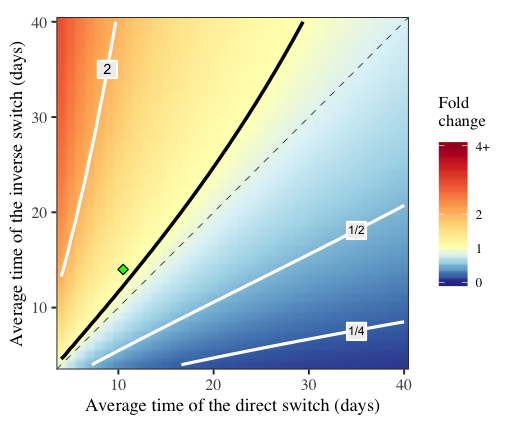

In [41]:
cs = c(4.25,3.6)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

outcome_threshold = 4
nbin=20; w=1; h=.9
cl_rc = brewer.pal(8,"Greys")[2]
cl_pt = "green" #brewer.pal(8,"Greens")[3]
vjst = .4
hjst = .5
df %>% filter(index==1) %>%
    mutate(outcome_cut=if_else(outcome>=outcome_threshold,outcome_threshold,outcome)) %>%
    ggplot(aes(x=T,y=Tbar,fill=outcome_cut)) + 
        geom_raster(interpolate=T) +
        geom_abline(slope=1,size=.2,linetype="dashed") + 
        stat_contour(aes(z=outcome),breaks=c(.2,.5,2,5), color=brewer.pal(8,"Greys")[1], size=.9) +
        stat_contour(aes(z=outcome),breaks=c(1), color="black", size=1) +
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        scale_fill_gradientn(limits=c(0,outcome_threshold),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=c(seq(0,1,length.out=6),seq(1,outcome_threshold,length.out=6)[-1])/outcome_threshold,
                             breaks=c(0,1,2,outcome_threshold),
                             labels=c(0,1,2,outcome_threshold%&%"+"),
                             name="Fold\nchange") +     
        xlab("Average time of the direct switch (days)") +
        ylab("Average time of the inverse switch (days)") +
        coord_equal() +
        annotate("point",x=10.5,y=14,shape=23,fill=cl_pt,size=2) +
        annotate("rect",xmin=8.85-w,xmax=8.85+w,ymin=35-h,ymax=35+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=8.85,y=35,label="2",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=35-w,xmax=35+w,ymin=18.1-h,ymax=18.1+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=35,y=18.1,label="1/2",size=2.5,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=35-w,xmax=35+w,ymin=7.5-h,ymax=7.5+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=35,y=7.5,label="1/4",size=2.5,vjust=vjst,hjust=hjst) +
        theme(legend.title=element_text(size=10,vjust=2),legend.text=element_text(size=8),
              axis.title=element_text(size=11)) -> p1
p1

ggsave(plot=p1,width=cs[1],height=cs[2],filename="../figures/draft/Fig6-A.pdf",useDingbats=FALSE)

## Two other supplementary figures for 5% and 20%

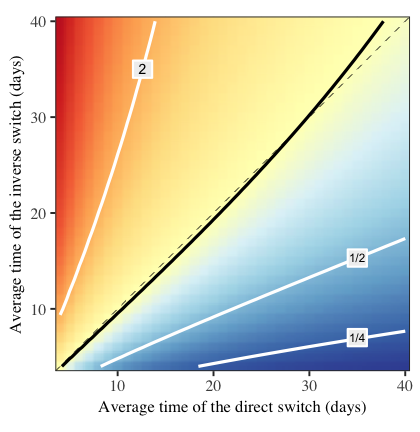

In [42]:
cs = c(3.5,3.6)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

df %>% filter(index==2) %>%
    mutate(outcome_cut=if_else(outcome>=outcome_threshold,outcome_threshold,outcome)) %>%
    ggplot(aes(x=T,y=Tbar,fill=outcome_cut)) + 
        geom_raster(interpolate=T) +
        geom_abline(slope=1,size=.2,linetype="dashed") + 
        stat_contour(aes(z=outcome),breaks=c(.2,.5,2,5), color=brewer.pal(8,"Greys")[1], size=.9) +
        stat_contour(aes(z=outcome),breaks=c(1), color="black", size=.9) +
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        scale_fill_gradientn(limits=c(0,outcome_threshold),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=c(seq(0,1,length.out=6),seq(1,outcome_threshold,length.out=6)[-1])/outcome_threshold,
                             breaks=c(1e-4,1,2,outcome_threshold/2,outcome_threshold),
                             labels=c(0,1,2,outcome_threshold/2,outcome_threshold%&%"+"),
                             name="Fold\nchange") + 
        xlab("Average time of the direct switch (days)") +
        ylab("Average time of the inverse switch (days)") +
        coord_equal() + guides(fill=FALSE) +
        annotate("rect",xmin=12.6-w,xmax=12.6+w,ymin=35-h,ymax=35+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=12.6,y=35,label="2",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=35-w,xmax=35+w,ymin=15.3-h,ymax=15.3+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=35,y=15.3,label="1/2",size=2.5,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=35-w,xmax=35+w,ymin=7-h,ymax=7+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=35,y=7,label="1/4",size=2.5,vjust=vjst,hjust=hjst) +
        theme(legend.title=element_text(size=10,vjust=10),legend.text=element_text(size=8),
              axis.title=element_text(size=10)) -> p2
p2

ggsave(plot=p2,width=cs[1],height=cs[2],filename="../figures/draft/Fig6-C.pdf",useDingbats=FALSE)

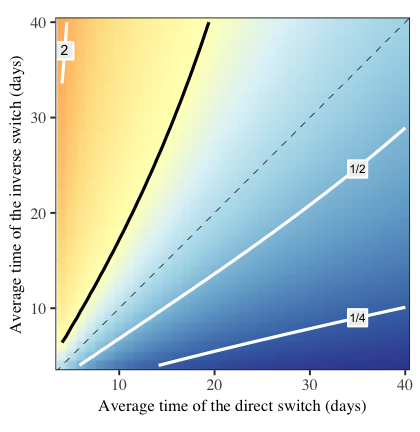

In [43]:
cs = c(3.5,3.6)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

df %>% filter(index==4) %>%
    mutate(outcome_cut=if_else(outcome>=outcome_threshold,outcome_threshold,outcome)) %>%
    ggplot(aes(x=T,y=Tbar,fill=outcome_cut)) + 
        geom_raster(interpolate=T) +
        geom_abline(slope=1,size=.2,linetype="dashed") + 
        stat_contour(aes(z=outcome),breaks=c(.2,.5,2,5), color=brewer.pal(8,"Greys")[1], size=.9) +
        stat_contour(aes(z=outcome),breaks=c(1), color="black", size=.9) +
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        scale_fill_gradientn(limits=c(0,outcome_threshold),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=c(seq(0,1,length.out=6),seq(1,outcome_threshold,length.out=6)[-1])/outcome_threshold,
                             breaks=c(1e-4,1,2,outcome_threshold/2,outcome_threshold),
                             labels=c(0,1,2,outcome_threshold/2,outcome_threshold),
                             name="Fold\nchange") + 
        xlab("Average time of the direct switch (days)") +
        ylab("Average time of the inverse switch (days)") +
        coord_equal() + guides(fill=FALSE) +
        annotate("rect",xmin=4.3-w,xmax=4.2+w,ymin=37-h,ymax=37+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=4.25,y=37,label="2",size=3,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=35-w,xmax=35+w,ymin=24.6-h,ymax=24.6+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=35,y=24.6,label="1/2",size=2.5,vjust=vjst,hjust=hjst) +
        annotate("rect",xmin=35-w,xmax=35+w,ymin=9-h,ymax=9+h,fill=cl_rc,color="white",size=.6) +
        annotate("text",x=35,y=9,label="1/4",size=2.5,vjust=vjst,hjust=hjst) +
        theme(legend.title=element_text(size=10,vjust=10),legend.text=element_text(size=8),
              axis.title=element_text(size=10)) -> p2
p2

ggsave(plot=p2,width=cs[1],height=cs[2],filename="../figures/draft/Fig6-B.pdf",useDingbats=FALSE)

# Change in optimal ratio for universal line

In [56]:
"../figures/draft/final-sensitivity_mu.csv" %>% 
    read.csv %>%
    filter(index==1) %>%
    select(-matches("err|outcome|_t")) %>%
    arrange(T,Tbar) -> df
#     group_by(T) %>% mutate(y = 1:n()) %>% ungroup %>%
#     group_by(Tbar) %>% mutate(x = 1:n()) %>% ungroup 
df %>% head

index,b,d,chi,c,alpha,theta,kappa,T,Tbar,mu,mubar,sw_start_x,sw_end_x,univ_point_x
1,0.140168,0.13,0.32596,0.1,0.3,0.45,40,4,4,0.25,0.2500000,0.7825212,0.6017496,0.6017496
1,0.140168,0.13,0.32596,0.1,0.3,0.45,40,4,5,0.25,0.2000000,0.8114374,0.6317303,0.6320968
1,0.140168,0.13,0.32596,0.1,0.3,0.45,40,4,6,0.25,0.1666667,0.8330145,0.6558606,0.6539675
1,0.140168,0.13,0.32596,0.1,0.3,0.45,40,4,7,0.25,0.1428571,0.8498301,0.6760536,0.6744310
1,0.140168,0.13,0.32596,0.1,0.3,0.45,40,4,8,0.25,0.1250000,0.8633630,0.6932731,0.6911404
1,0.140168,0.13,0.32596,0.1,0.3,0.45,40,4,9,0.25,0.1111111,0.8745125,0.7083300,0.7080787


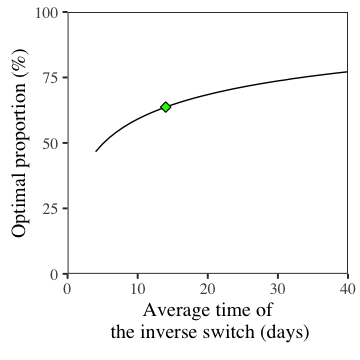

In [68]:
cs = c(3,3)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

# close values to these two: 7.033, 13.76
Tbs = 11; Tbarbs = 14
baseline_values = filter(df,T==Tbs&Tbar==Tbarbs)
df %>%
    filter(T==Tbs) %>%
    ggplot(aes(x=Tbar)) +
        geom_line(aes(y=sw_end_x),size=.4) +
        coord_cartesian(expand=0.0,ylim=c(0,1),xlim=c(0,40)) +
        xlab("Average time of\n the inverse switch (days)") + ylab("Optimal proportion (%)") +
        theme(
            panel.grid.major = element_blank(),#element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        scale_y_continuous(breaks=seq(0,1,length.out=5),labels=100*seq(0,1,length.out=5)) +
        annotate("point",x=Tbarbs,y=baseline_values$sw_end_x,shape=23,fill=cl_pt,size=2) -> p

p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../figures/draft/FigS7-B.pdf",useDingbats=FALSE)

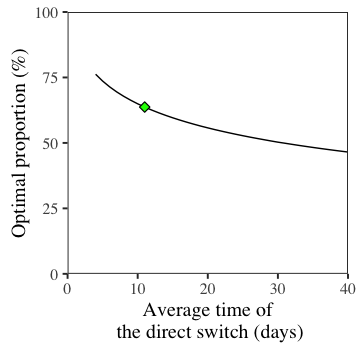

In [69]:
df %>%
    filter(Tbar==Tbarbs) %>%
    ggplot(aes(x=T)) +
        geom_line(aes(y=sw_end_x),size=.4) +
        coord_cartesian(expand=0.0,ylim=c(0,1),xlim=c(0,40)) +
        xlab("Average time of\n the direct switch (days)") + ylab("Optimal proportion (%)") +
        theme(
            panel.grid.major = element_blank(),#element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        scale_y_continuous(breaks=seq(0,1,length.out=5),labels=100*seq(0,1,length.out=5)) +
        annotate("point",x=Tbs,y=baseline_values$sw_end_x,shape=23,fill=cl_pt,size=2) -> p

p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../figures/draft/FigS7-A.pdf",useDingbats=FALSE)

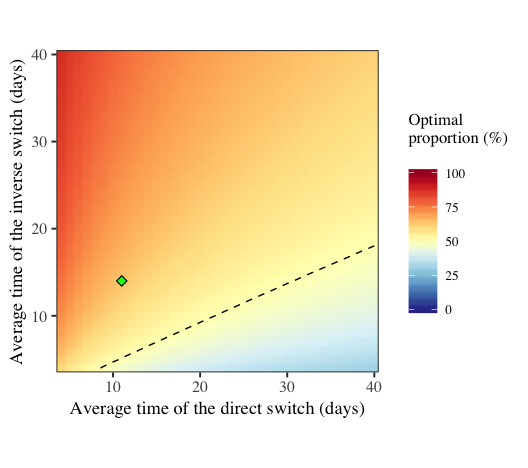

In [72]:
cs = c(4.4,3.9)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])
nbin=20; w=3; h=2.2
cl_rc = brewer.pal(8,"Greys")[2]
cl_pt = "green" #brewer.pal(8,"Greens")[3]
vjst = .4
hjst = .5
df %>% filter(index==1) %>%
    ggplot(aes(x=T,y=Tbar,fill=sw_end_x)) + 
        geom_raster(interpolate=T) +
        stat_contour(aes(z=sw_end_x),breaks=c(.5), color="black", size=.4, linetype="dashed") +
        scale_x_continuous(expand=c(0,0)) + scale_y_continuous(expand=c(0,0)) +
        scale_fill_gradientn(limits=c(0,1),
                             colours=rev(brewer.pal(11,"RdYlBu")),
                             values=seq(0,1,length.out=11),
                             breaks=seq(0,1,length.out=5),
                             labels=100*seq(0,1,length.out=5),
                             name="Optimal\nproportion (%)\n") +     
        xlab("Average time of the direct switch (days)") +
        ylab("Average time of the inverse switch (days)") +
        coord_equal() +
        annotate("point",x=Tbs,y=Tbarbs,shape=23,fill=cl_pt,size=2) +
        theme(legend.title=element_text(size=10,vjust=0),legend.text=element_text(size=8),
              axis.title=element_text(size=11)) -> p

p

ggsave(plot=p,width=cs[1],height=cs[2],filename="../figures/draft/FigS7-C.pdf",useDingbats=FALSE)

# Varying other parameters

## Cost of resistance

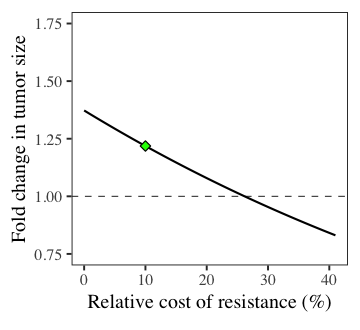

In [60]:
"../figures/draft/final-sensitivity_c.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(c) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

c_relative_bs = .1
outcome_bs = filter(df_,c_relative==c_relative_bs)$outcome

pC = df_ %>%
    mutate(Value = c_relative*100) %>%
    ggplot(aes(x=Value,y=outcome)) +
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(.75,1.75)) +
        ylab("Fold change in tumor size") + xlab("Relative cost of resistance (%)") +
        theme(
            panel.grid.major = element_blank(),#element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        annotate("point",x=c_relative_bs*100,y=outcome_bs,shape=23,fill=cl_pt,size=2) 

pC

# Sensitivity on $\alpha$

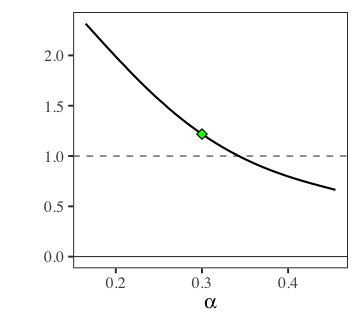

In [61]:
"../figures/draft/final-sensitivity_alpha.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(alpha) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])
alpha_bs = 0.3

pAlpha = df_ %>% 
    ggplot(aes(x=alpha,y=outcome)) + 
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01) +
        ylab("Fold change in tumor size") + xlab(expression(alpha))  +
        theme(
            axis.title.y = element_text(colour=NA),
            panel.grid.major = element_blank(),#element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.9),"lines")) + 
        annotate("point",x=alpha_bs,y=outcome_bs,shape=23,fill=cl_pt,size=2)
pAlpha

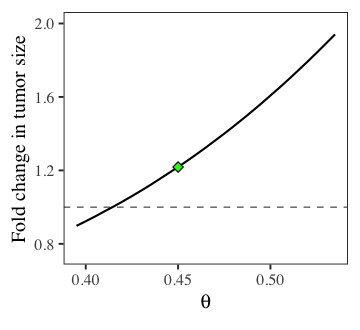

In [62]:
"../figures/draft/final-sensitivity_theta.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(theta) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

pTheta = df_ %>% gather(Variable,Value,-outcome) %>%
    ggplot(aes(x=Value,y=outcome)) + 
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(.75,2)) +
        ylab("Fold change in tumor size") + xlab(expression(theta)) +
        theme(
            #axis.title.y = element_text(colour=NA),
            panel.grid.major = element_blank(),#element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        annotate("point",x=.45,y=outcome_bs,shape=23,fill=cl_pt,size=2)

pTheta

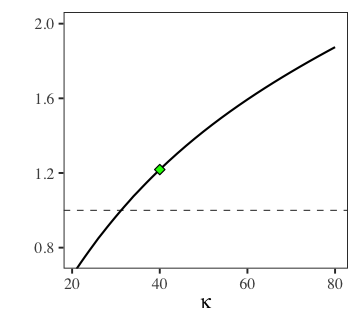

In [63]:
"../figures/draft/final-sensitivity_kappa.csv" %>% 
    read.csv(colClasses='numeric') %>%
    select(-matches("err|sw_end|univ_point")) %>%
    arrange(kappa) -> df_

cs = c(3,2.75)
options(repr.plot.width=cs[1],repr.plot.height=cs[2])

pKappa = df_ %>%
    ggplot(aes(x=kappa,y=outcome)) +
        geom_hline(yintercept=1,size=.25,color="black",linetype="dashed") +
        geom_hline(yintercept=0,size=.25,color="black",linetype="solid") +
        geom_line(size=.6) +
        coord_cartesian(expand=0.01,ylim=c(.75,2)) +
        ylab("Fold change in tumor size") + xlab(expression(kappa)) +
        theme(
            axis.title.y = element_text(colour=NA),
            panel.grid.major = element_blank(),#element_line(colour="grey",size=.2), 
            panel.grid.minor = element_blank(),
            plot.margin=unit(c(.5,.5,.75,.5),"lines")) + 
        annotate("point",x=40,y=outcome_bs,shape=23,fill=cl_pt,size=2)

pKappa

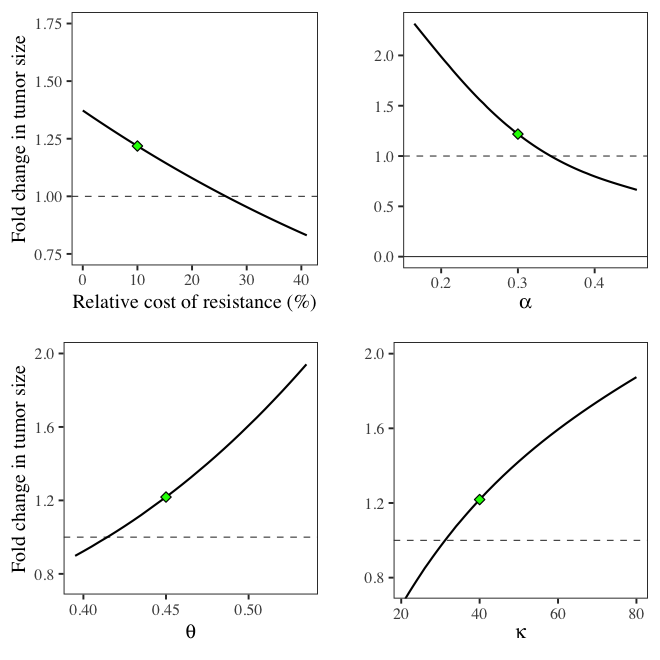

In [64]:
cs = c(5.5,5.5)
options(repr.plot.width=cs[1],repr.plot.height=cs[2]) 
pFinal = grid.arrange(ggplotGrob(pC), ggplotGrob(pAlpha), ggplotGrob(pTheta), 
             ggplotGrob(pKappa), nrow=2)

ggsave(plot=pFinal,height=cs[2],width=cs[1],dpi=200,filename="../figures/FigS8.pdf",useDingbats=FALSE)